#**FINAL PROJECT BIG DATA ENGINEERING**
Irene Sainz de la Maza, Miguel Rey Romero, Sara Temiño Macaya

##**Summary**

#Pneumonia Overview

Pneumonia is an infection that affects one or both lungs. It causes the air sacs, or alveoli, of the lungs to fill up with fluid or pus. Bacteria, viruses, or fungi may cause pneumonia. Symptoms can range from mild to serious and may include a cough with or without mucus (a slimy substance), fever, chills, and trouble breathing. How serious your pneumonia is depends on your age, your overall health, and what is causing your infection.

To diagnose pneumonia, your doctor will review your medical history, perform a physical exam, and order diagnostic tests such as a chest X-ray. This information can help your doctor determine what type of pneumonia you have (NHLBI, NIH, 2020).

#Symptoms of pneumonia

The symptoms of pneumonia can develop suddenly over 24 to 48 hours, or they may come on more slowly over several days.

Common symptoms of pneumonia include:

    a cough – which may be dry, or produce thick yellow, green, brown or blood-stained mucus (phlegm)
    difficulty breathing – your breathing may be rapid and shallow, and you may feel breathless, even when resting
    rapid heartbeat
    high temperature
    feeling generally unwell
    sweating and shivering
    loss of appetite
    chest pain – which gets worse when breathing or coughing

Less common symptoms include:

    coughing up blood (haemoptysis)
    headaches
    fatigue
    feeling sick or being sick
    wheezing
    joint and muscle pain
    feeling confused and disorientated, particularly in elderly people

(NHS website, 2021)

#Objetive of the analysis

Due to the significant relationship of Covid-19 with pneumonia, it is interesting to study ways to streamline the diagnostic process. The implementation of clinical-decision support algorithms for medical imaging faces challenges with reliability and interpretability. Here, we establish a diagnostic tool based on a deep-learning framework for the screening of patients with pneumonia. Our framework utilizes transfer learning, which trains a neural network with a fraction of the data of conventional approaches. Applying this approach to a dataset of chest x-ray images, we demonstrate performance comparable to that of human experts in classifying pneumonia development in pacients with coronavirus. This tool may ultimately aid in expediting the diagnosis and referral of these treatable condition, thereby facilitating earlier treatment, resulting in improved clinical outcomes (Kermany, D. S. *et al.*, 2018).



##**Visualizing the data**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import numpy as np # linear algebra
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150
def get_visualization_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [ ]:
train_visualization = get_visualization_data('/content/drive/MyDrive/FINAL PROJECT BDE/chest_xray/train')
test_visualization = get_visualization_data('/content/drive/MyDrive/FINAL PROJECT BDE/chest_xray/test')
val_visualization = get_visualization_data('/content/drive/MyDrive/FINAL PROJECT BDE/chest_xray/val')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Validation data')

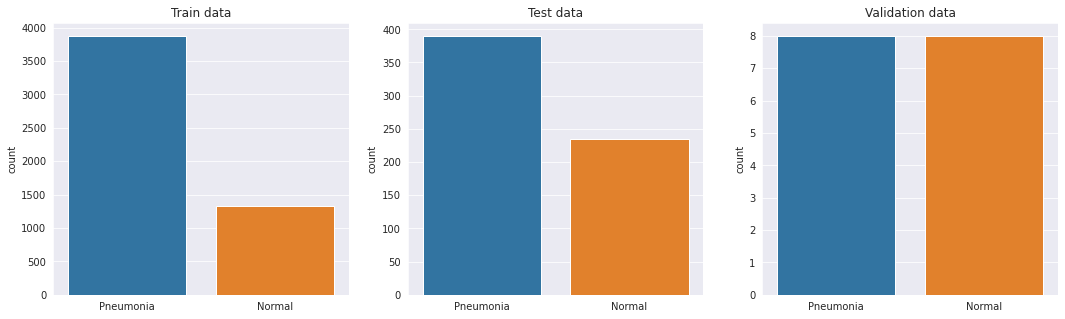

In [ ]:
l = []
for i in train_visualization:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
sns.set_style('darkgrid')  

m = []
for i in test_visualization:
    if(i[1] == 0):
        m.append("Pneumonia")
    else:
        m.append("Normal")
sns.set_style('darkgrid')

s = []
for i in val_visualization:
    if(i[1] == 0):
        s.append("Pneumonia")
    else:
        s.append("Normal")
sns.set_style('darkgrid')

plt.figure(figsize=(18, 5))

plt.subplot(1,3,1)
sns.countplot(l)
plt.title("Train data")

plt.subplot(1,3,2)
sns.countplot(m)
plt.title("Test data")

plt.subplot(1,3,3)
sns.countplot(s)
plt.title("Validation data")

Text(0.5, 1.0, 'NORMAL')

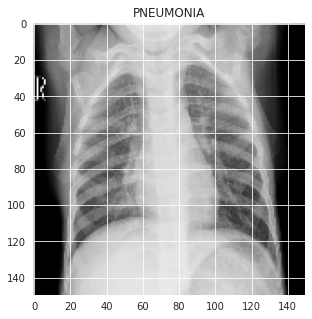

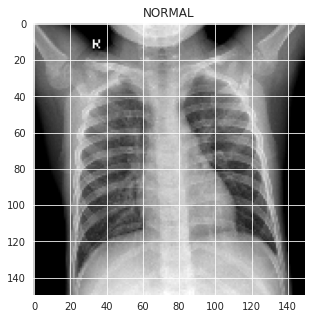

In [ ]:
plt.figure(figsize = (5,5))
plt.imshow(train_visualization[0][0], cmap='gray')
plt.title(labels[train_visualization[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train_visualization[-1][0], cmap='gray')
plt.title(labels[train_visualization[-1][1]])

## **Environment Preparation**

**Installing jdk8:**

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
# Set environment variable JAVA_HOME.
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -versio

**Installing Analytics Zoo:**

In [ ]:
# Install latest pre-release version of Analytics Zoo
# Installing Analytics Zoo from pip will automatically install pyspark, bigdl, and their dependencies.
!pip install --pre --upgrade analytics-zoo[ray]

     |████████████████████████████████| 194.7 MB 63 kB/s 
     |████████████████████████████████| 114.0 MB 29 kB/s 
     |████████████████████████████████| 218.4 MB 63 kB/s 
     |████████████████████████████████| 62 kB 732 kB/s 
     |████████████████████████████████| 47.5 MB 95 kB/s 
     |████████████████████████████████| 1.3 MB 44.6 MB/s 
     |████████████████████████████████| 65 kB 4.4 MB/s 
     |████████████████████████████████| 94 kB 3.5 MB/s 
     |████████████████████████████████| 271 kB 49.5 MB/s 
     |████████████████████████████████| 197 kB 58.4 MB/s 
     |████████████████████████████████| 82 kB 247 kB/s 
     |████████████████████████████████| 173 kB 70.1 MB/s 
     |████████████████████████████████| 3.0 MB 65.8 MB/s 
     |████████████████████████████████| 128 kB 56.2 MB/s 
     |████████████████████████████████| 202 kB 51.6 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.6-py2.py3-none-any.whl size=21881

**Import of other required libraries and modules:**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

##**Init Orca Context**


In [ ]:
# import necesary libraries and modules
from zoo.orca import init_orca_context, stop_orca_context
from zoo.orca import OrcaContext

In [ ]:
# recommended to set it to True when running Analytics Zoo in Jupyter notebook 
OrcaContext.log_output = True # (this will display terminal's stdout and stderr in the Jupyter notebook).

cluster_mode = "local"

if cluster_mode == "local":  
    init_orca_context(cluster_mode="local", cores=1) # run in local mode
elif cluster_mode == "yarn":  
    init_orca_context(cluster_mode="yarn-client", num_nodes=2, cores=2, driver_memory="6g") # run on Hadoop YARN cluster

Initializing orca context
Current pyspark location is : /usr/local/lib/python3.7/dist-packages/pyspark/__init__.py
Start to getOrCreate SparkContext
pyspark_submit_args is:  --driver-class-path /usr/local/lib/python3.7/dist-packages/zoo/share/lib/analytics-zoo-bigdl_0.13.1-SNAPSHOT-spark_2.4.6-0.12.0-SNAPSHOT-jar-with-dependencies.jar:/usr/local/lib/python3.7/dist-packages/bigdl/share/lib/bigdl-0.13.1-SNAPSHOT-jar-with-dependencies.jar pyspark-shell 
2022-02-11 19:32:14 WARN  NativeCodeLoader:62 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


cls.getname: com.intel.analytics.bigdl.python.api.Sample
BigDLBasePickler registering: bigdl.util.common  Sample
cls.getname: com.intel.analytics.bigdl.python.api.EvaluatedResult
Successfully got a SparkContext
BigDLBasePickler registering: bigdl.util.common  EvaluatedResult
cls.getname: com.intel.analytics.bigdl.python.api.JTensor
BigDLBasePickler registering: bigdl.util.common  JTensor
cls.getname: com.intel.analytics.bigdl.python.api.JActivity
BigDLBasePickler registering: bigdl.util.common  JActivity



User settings:

   KMP_AFFINITY=granularity=fine,compact,1,0
   KMP_BLOCKTIME=0
   KMP_SETTINGS=1
   OMP_NUM_THREADS=1

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_HAND_THREAD=false
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=false
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_FORKJOIN_FRAMES=true
   KMP_FORKJOIN_FRAMES_MODE=3
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_ITT_PREPARE_DELAY=0
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_MWAIT_HINTS=0
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_

**Obtaining the spark session initiated by Orca:**

In [ ]:
spark = OrcaContext.get_spark_session()

**We manually downloaded the Kaggle dataset and stored it in Google Drive, so the access to google drive is needed:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Paths to the base directories containing the X-ray images to be used as train, test and validation:**

In [ ]:
ptrain = '/content/drive/MyDrive/TRABAJO FINAL/chest_xray/train' 
ptest = '/content/drive/MyDrive/TRABAJO FINAL/chest_xray/test'
pval = '/content/drive/MyDrive/TRABAJO FINAL/chest_xray/val'

##**Building the model**

In [ ]:
import numpy as np # forlinear algebra
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image_dataset_from_directory


**The model_creator function, in which the neural network model is defined, is shown below. This network has been constructed using the sequential keras mode:**

First, we create 1 layer of 32 convolutional neurons, defining the activation function as 'relu' and the input data size. Next, we create a MaxPooling layer to reduce the dimensionality of the image to reduce the computational cost and minimize the possibility of 'overfitting'. We add another layer of 32 convolutional neurons (with 'relu' activation function) and another MaxPooling layer. After the 2 layers of 32 convolutional neurons, we create a Flatten layer to convert the two-dimensional output of the previous layer into a one-dimensional input of the next one, followed by 2 Fully Connected (FC) layers which will take out feature map of an image and make predictions about it. The first FC has 128 neurons, and the second FC has only 1 neuron because it needs to predict if someone has pneumonia. This layer of 1 unit has the activation function 'sigmoid' to perform a binary classification.

To train the model, we use the Adam optimizer and the binary crossentropy as loss function for binary classification. The metric obtained is the accuracy.


In [ ]:
def model_creator(config):
    import tensorflow as tf
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(150, 150, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(32, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size = (2, 2))) 
    model.add(Flatten())
    model.add(Dense(activation = 'relu', units = 128))
    model.add(Dense(activation = 'sigmoid', units = 1))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return model

##**Generating datasets**

We define three functions that will be called later in the model, whose purpose is to load the data. In order to use them within the Orca Estimator, we define data_creator functions for one of the subsets used in the model development: training, validation and evaluation. These functions contain all the steps that occur from the creation of the datasets until the dataset is ready to be used by the Estimator. Orca allows to distribute any transformation or pipeline that occurs in the dataset.

To create the TensorFlow Datasets we use the Keras function image_dataset_from_directory, resizing them to (150, 150), and setting the number of channels to 3 (rgb), defining the label_mode, class_names and batch size required in each of the datasets, with suffle = 'True'. Due to the small amount of data we have in the training set, we will use data augmentation to try to artificially increase the size of this data set. To do this, we will randomly flip some images horizontally and rotate them slightly. We create a data_augmentation pipeline using the Keras Sequential API, and duplicate the training set and apply the augmentation pipeline. The latter is only necessary on the training data, so we do not repeat it on the validation and evaluation data. Finally, since the label_mode is binary, the labels are a float32 tensor of 1s and 0s of shape (batch_size, 1), so we will cast it to tf.float32 in the three datasets.

In [ ]:
def preprocess(x, y):
    x = tf.cast(tf.reshape(x, (150, 150, 3)), dtype=tf.float32) / 255.0
    return x, y

#Function for uploading train data
def train_data_creator(config, batch_size):
    image_size = (150, 150)
    batch_size = 1

    train_ds = tf.keras.preprocessing.image_dataset_from_directory(
        ptrain,
        image_size=image_size,
        batch_size=batch_size,
        shuffle=True,
        label_mode='binary',
        class_names = ['NORMAL', 'PNEUMONIA'],
        )

    data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation((-0.2, 0.2)),
    ]
    )

    train_ds = train_ds.repeat(2)
    train_ds = train_ds.map(preprocess)
    train_ds = train_ds.batch(batch_size)
    train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))
    
    return train_ds

#Function for uploading test data
def test_data_creator(config, batch_size):
    image_size = (150, 150)
    batch_size = 1

    test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        ptest,
        image_size=image_size,
        batch_size=batch_size,
        shuffle=True,
        label_mode='binary',
        class_names = ['NORMAL', 'PNEUMONIA'],
        )

    test_ds = test_ds.repeat(2)
    test_ds = test_ds.map(preprocess)
    test_ds = test_ds.batch(batch_size)
    
    return test_ds

#Function for uploading validation data
def val_data_creator(config, batch_size):
    image_size = (150, 150)
    batch_size = 1

    val_ds = tf.keras.preprocessing.image_dataset_from_directory(
        pval,
        image_size=image_size,
        batch_size=batch_size,
        shuffle=True,
        label_mode='binary',
        class_names = ['NORMAL', 'PNEUMONIA'],
        )

    val_ds = val_ds.repeat(2)
    val_ds = val_ds.map(preprocess)
    val_ds = val_ds.batch(batch_size)
    return val_ds

## **Training the model**

**Creation of an instance of the Estimator provided by Orca (Analytics Zoo) from the model previously defined:**

In [ ]:
from zoo.orca.learn.tf2 import Estimator
est = Estimator.from_keras(model_creator=model_creator)

2022-02-11 19:32:39,506	INFO services.py:1174 -- View the Ray dashboard at http://172.28.0.2:8265


{'node_ip_address': '172.28.0.2', 'raylet_ip_address': '172.28.0.2', 'redis_address': '172.28.0.2:6379', 'object_store_address': '/tmp/ray/session_2022-02-11_19-32-38_800850_70/sockets/plasma_store', 'raylet_socket_name': '/tmp/ray/session_2022-02-11_19-32-38_800850_70/sockets/raylet', 'webui_url': '172.28.0.2:8265', 'session_dir': '/tmp/ray/session_2022-02-11_19-32-38_800850_70', 'metrics_export_port': 63183, 'node_id': '8ed74ec0fbb65e64ada76f54ded4d34c64a0352532ea9d6341242223'}


(pid=607) WARNING:tensorflow:From /usr/local/lib/python3.7/dist-packages/zoo/orca/learn/tf2/tf_runner.py:317: _CollectiveAllReduceStrategyExperimental.__init__ (from tensorflow.python.distribute.collective_all_reduce_strategy) is deprecated and will be removed in a future version.
(pid=607) Instructions for updating:
(pid=607) use distribute.MultiWorkerMirroredStrategy instead
(pid=607) 2022-02-11 19:32:45.385299: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


**Keras supports the early stopping of training via a callback called EarlyStopping. This callback allows you to specify the performance measure to monitor, the trigger, and once triggered, it will stop the training process.** 

In [ ]:
show_notes = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=2,
    verbose=2,
    restore_best_weights=True,
)

**Fitting the model with Orca Estimator (using train_data_creator and val_data_creator functions):**

In [ ]:
stats = est.fit(train_data_creator,
                epochs=5,
                batch_size = 32,
                validation_data=val_data_creator,
                callbacks = show_notes,)

(pid=607) Found 5237 files belonging to 2 classes.


(pid=607) WARNING:tensorflow:AutoGraph could not transform <function preprocess at 0x7f06a019cb00> and will run it as-is.
(pid=607) Cause: Unable to locate the source code of <function preprocess at 0x7f06a019cb00>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
(pid=607) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=607) WARNING:tensorflow:AutoGraph could not transform <function train_data_creator.<locals>.<lambda> at 0x7f069e4e4680> and will run it as-is.
(pid=607) Cause: could not parse the source code of <function train_data_creator.<locals>.<lambda> at 0x7f069e4e4680>: no matching AST found among candidates:
(pid=607) 
(pid=607) To silence 

(pid=607) Found 16 files belonging to 2 classes.


(pid=607) WARNING:tensorflow:AutoGraph could not transform <function preprocess at 0x7f069fdcf830> and will run it as-is.
(pid=607) Cause: Unable to locate the source code of <function preprocess at 0x7f069fdcf830>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
(pid=607) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=607) 2022-02-11 19:33:07.476180: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
(pid=607) op: "TensorSliceDataset"
(pid=607

Se han truncado las últimas 5000 líneas del flujo de salida.
 5536/10474 [==============>...............] - ETA: 7:23 - loss: 0.4007 - accuracy: 0.8324
(pid=607) 
(pid=607)  5537/10474 [==============>...............]
(pid=607)  - ETA: 7:23 - loss: 0.4007 - accuracy: 0.8324
 5621/10474 [===============>..............]
(pid=607)  - ETA: 7:15 - loss: 0.3995 - accuracy: 0.8333
 5747/10474 [===============>..............] - ETA: 7:03 - loss: 0.3985 - accuracy: 0.8338
(pid=607) 
(pid=607)  5748/10474 [===============>..............] - ETA: 7:03 - loss: 0.3984 - accuracy: 0.8339
 6000/10474 [================>.............] - ETA: 6:40 - loss: 0.3948 - accuracy: 0.8353
(pid=607) 
(pid=607)  6001/10474 [================>........

(pid=607) 2022-02-11 19:48:39.069821: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
(pid=607) op: "TensorSliceDataset"
(pid=607) input: "Placeholder/_0"
(pid=607) attr {
(pid=607)   key: "Toutput_types"
(pid=607)   value {
(pid=607)     list {
(pid=607)       type: DT_STRING
(pid=607)     }
(pid=607)   }
(pid=607) }
(pid=607) attr {
(pid=607)   key: "_cardinality"
(pid=607)   value {
(pid=607)     i: 16
(pid=607)   }
(pid=607) }
(pid=607) attr {
(pid=607)   key: "is_files"
(pid=607)   value {
(pid=607)     b: false
(pid=607)   }
(pid=607) }
(pid=607) attr {
(pid=607)   key: "metadata"
(pid=607)   value {
(pid=607)     s: "\n\025TensorSliceDataset:12"
(pid=607)   }
(pid=607) }
(pid=607) attr {
(pid=607)   key: "output_shapes"
(pid=607)   value {
(pid=607)     list {
(pid=607)   

Se han truncado las últimas 5000 líneas del flujo de salida.
 6070/10474 [================>.............] - ETA: 6:19 - loss: 0.2404 - accuracy: 0.9016
(pid=607) 
(pid=607) 
(pid=607)  6071/10474 [================>.............] - ETA: 6:18 - loss: 0.2405 - accuracy: 0.9015
 6655/10474 [==================>...........] - ETA: 5:30 - loss: 0.2439 - accuracy: 0.8999
(pid=607) 
 7261/10474 [===================>..........]
(pid=607)  - ETA: 4:39 - loss: 0.2433 - accuracy: 0.9004
 7765/10474 [=====================>........]
(pid=607)  - ETA: 3:56 - loss: 0.2425 - accuracy: 0.9005
 8603/10474 [=======================>......] - ETA: 2:44 - loss: 0.2352 - accuracy: 0.9036
(pid=607) 
(pid=607)  8604/10474 [=======================>

(pid=607) 2022-02-11 20:05:05.051965: W tensorflow/core/framework/dataset.cc:744] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


Se han truncado las últimas 5000 líneas del flujo de salida.
 5597/10474 [===============>..............] - ETA: 7:22 - loss: 0.1997 - accuracy: 0.9198
(pid=607) 
(pid=607) 
(pid=607)  5598/10474 [===============>..............] - ETA: 7:22 - loss: 0.1996 - accuracy: 0.9198
 6020/10474 [================>.............]
(pid=607)  - ETA: 6:46 - loss: 0.1995 - accuracy: 0.9203
 6551/10474 [=================>............]
(pid=607)  - ETA: 6:01 - loss: 0.2022 - accuracy: 0.9197
 6573/10474 [=================>............]
(pid=607)  - ETA: 5:59 - loss: 0.2020 - accuracy: 0.9198
 8407/10474 [=======================>......]
(pid=607)  - ETA: 3:15 - loss: 0.1973 - accuracy: 0.9224
 8501/10474 [=======================>......] - ETA: 3:07 - loss: 0.1970 - accuracy: 0.9224
(pid=607) 
 9693/10474 [======================

(pid=607) 2022-02-11 20:22:44.935649: W tensorflow/core/framework/dataset.cc:744] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


Se han truncado las últimas 5000 líneas del flujo de salida.
 5817/10474 [===============>..............]
(pid=607)  - ETA: 7:54 - loss: 0.1660 - accuracy: 0.9364
 5930/10474 [===============>..............]
(pid=607)  - ETA: 7:43 - loss: 0.1679 - accuracy: 0.9361
 7613/10474 [====================>.........]
(pid=607)  - ETA: 4:58 - loss: 0.1678 - accuracy: 0.9368
 7748/10474 [=====================>........]
(pid=607)  - ETA: 4:44 - loss: 0.1668 - accuracy: 0.9371
 7885/10474 [=====================>........] - ETA: 4:30 - loss: 0.1657 - accuracy: 0.9377
(pid=607) 
(pid=607)  7886/10474 [=====================>........]
(pid=607)  - ETA: 4:30 - loss: 0.1657 - accuracy: 0.9377
 8725/10474 [=======================>......] - ETA: 3:04 - loss: 0.1622 - accuracy: 0.9385
(pid=607) 
 8865/10474 [======================

(pid=607) 2022-02-11 20:41:55.090899: W tensorflow/core/framework/dataset.cc:744] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.


Se han truncado las últimas 5000 líneas del flujo de salida.
 5616/10474 [===============>..............] - ETA: 8:56 - loss: 0.1445 - accuracy: 0.9473
(pid=607) 
(pid=607)  5617/10474 [===============>..............] - ETA: 8:56 - loss: 0.1445 - accuracy: 0.9473
 5701/10474 [===============>..............] - ETA: 8:47 - loss: 0.1454 - accuracy: 0.9470
(pid=607) 
 5987/10474 [================>.............]
(pid=607)  - ETA: 8:18 - loss: 0.1458 - accuracy: 0.9471
 6130/10474 [================>.............] - ETA: 8:03 - loss: 0.1459 - accuracy: 0.9470
(pid=607) 
(pid=607)  6131/10474 [================>.............] - ETA: 8:03 - loss: 0.1458 - accuracy: 0.9470
 6227/10474 [================>.............]
(pid=607)  - E

(pid=607) 2022-02-11 21:02:49.102018: W tensorflow/core/framework/dataset.cc:744] Input of GeneratorDatasetOp::Dataset will not be optimized because the dataset does not implement the AsGraphDefInternal() method needed to apply optimizations.
(pid=607) 2022-02-11 21:02:50.068793: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at multi_device_iterator_ops.cc:789 : NOT_FOUND: Resource AnonymousMultiDeviceIterator/AnonymousMultiDeviceIterator15/N10tensorflow4data12_GLOBAL__N_119MultiDeviceIteratorE does not exist.


10474/10474 [==============================] - 1212s 116ms/step - loss: 0.1420 - accuracy: 0.9475 - val_loss: 0.2376 - val_accuracy: 0.8750


## **Evaluating the model**

**Once the Estimator has trained correctly, we evaluate it by loading the evaluation data by calling the corresponding validation and test functions:**

In [ ]:
val_stats = est.evaluate(val_data_creator, batch_size = 32)
val_stats

(pid=607) Found 16 files belonging to 2 classes.


(pid=607) WARNING:tensorflow:AutoGraph could not transform <function preprocess at 0x7f069e50a0e0> and will run it as-is.
(pid=607) Cause: Unable to locate the source code of <function preprocess at 0x7f069e50a0e0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
(pid=607) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=607) 2022-02-11 21:03:01.100104: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
(pid=607) op: "TensorSliceDataset"
(pid=607

32/32 [==============================] - 1s 20ms/step - loss: 0.2376 - accuracy: 0.8750


(pid=607) 2022-02-11 21:03:01.973318: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at multi_device_iterator_ops.cc:789 : NOT_FOUND: Resource AnonymousMultiDeviceIterator/AnonymousMultiDeviceIterator17/N10tensorflow4data12_GLOBAL__N_119MultiDeviceIteratorE does not exist.


{'validation_accuracy': 0.875, 'validation_loss': 0.23756012320518494}

In [ ]:
test_stats = est.evaluate(test_data_creator, batch_size = 32)
test_stats

(pid=607) Found 624 files belonging to 2 classes.


(pid=607) WARNING:tensorflow:AutoGraph could not transform <function preprocess at 0x7f069fcefcb0> and will run it as-is.
(pid=607) Cause: Unable to locate the source code of <function preprocess at 0x7f069fcefcb0>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
(pid=607) To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
(pid=607) 2022-02-11 21:03:05.755108: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:766] AUTO sharding policy will apply DATA sharding policy as it failed to apply FILE sharding policy because of the following reason: Found an unshardable source dataset: name: "TensorSliceDataset/_1"
(pid=607) op: "TensorSliceDataset"
(pid=607

  41/1248 [..............................]
(pid=607)  - ETA: 2:24 - loss: 0.9755 - accuracy: 0.7073
 118/1248 [=>............................] - ETA: 1:40 - loss: 0.6300 - accuracy: 0.7797
(pid=607) 
(pid=607)  119/1248 [=>............................] - ETA: 1:42 - loss: 0.6339 - accuracy: 0.7731
 931/1248 [=====================>........]
(pid=607)  - ETA: 16s - loss: 0.5462 - accuracy: 0.7895
1094/1248 [=========================>....]
(pid=607)  - ETA: 7s - loss: 0.5311 - accuracy: 0.7943
1248/1248 [==============================] - 57s 45ms/step - loss: 0.5332 - accuracy: 0.7933


(pid=607) 2022-02-11 21:04:03.040541: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at multi_device_iterator_ops.cc:789 : NOT_FOUND: Resource AnonymousMultiDeviceIterator/AnonymousMultiDeviceIterator19/N10tensorflow4data12_GLOBAL__N_119MultiDeviceIteratorE does not exist.


{'validation_accuracy': 0.7932692170143127,
 'validation_loss': 0.5332270860671997}

## **Conclusion**

The accuracy obtained in model training is 95%, with a loss value of 0.14. Regarding the model evaluation, the accuracy obtained with the validation set is 88% with a loss value of 0.23; and the accuracy obtained with the test set is 79.3%. 

The accuracy gives us an overall view of the quality of the classification, so it can be considered that the proposed model is valid to predict with relatively high accuracy (79%) whether a radiograph corresponds to a patient with pneumonia or not. 

Loss is a value that represents the summation of errors in our model. It measures how well (or bad) our model is doing. If the errors are high, the loss will be high, which means that the model does not do a good job. Otherwise, the lower it is, the better our model works. The loss function is used by the model to learn, and as can be seen, the loss value obtained in the train is 0.14 and in the validation is 0.23, which confirms that the proposed model is good.

## **BIBLIOGRAPHY**

Pneumonia | NHLBI, NIH. (2020). National Heart, Lung, and Blood Institute. https://www.nhlbi.nih.gov/health/pneumonia

NHS website. (2021). Pneumonia. Nhs.Uk. https://www.nhs.uk/conditions/pneumonia/

Kermany, D. S., Goldbaum, M., Cai, W., Valentim, C. C., Liang, H., Baxter, S. L., McKeown, A., Yang, G., Wu, X., Yan, F., Dong, J., Prasadha, M. K., Pei, J., Ting, M. Y., Zhu, J., Li, C., Hewett, S., Dong, J., Ziyar, I., . . . Zhang, K. (2018). Identifying Medical Diagnoses and Treatable Diseases by Image-Based Deep Learning. Cell, 172(5), 1122–1131.e9. https://doi.org/10.1016/j.cell.2018.02.010

https://www.kaggle.com/sanwal092/intro-to-cnn-using-keras-to-predict-pneumonia

https://analytics-zoo.readthedocs.io/en/latest/doc/Orca/QuickStart/orca-tf2keras-quickstart.html